# Sentiment Analysis with SVM
This notebook trains a sentiment analysis model using SVM on a balanced dataset.

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
import pickle

In [14]:
# Load the dataset
file_path = 'Balanced_Reviews(500).csv'
data = pd.read_csv(file_path)

# Convert rating column to numeric
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
data = data.dropna(subset=['rating'])
data['rating'] = data['rating'].astype(int)

# Create sentiment column
data['sentiment'] = data['rating'].apply(lambda x: 'positive' if x >= 4 else ('neutral' if x == 3 else 'negative'))

In [15]:
# Drop NaN values in content
data = data.dropna(subset=['content'])

# Separate majority and minority classes
positive = data[data.sentiment == 'positive']
neutral = data[data.sentiment == 'neutral']
negative = data[data.sentiment == 'negative']

In [16]:
# Upsample minority classes
neutral_upsampled = resample(neutral,
                             replace=True,     # sample with replacement
                             n_samples=len(positive),    # to match majority class
                             random_state=42) # reproducible results
negative_upsampled = resample(negative,
                              replace=True,     # sample with replacement
                              n_samples=len(positive),    # to match majority class
                              random_state=42) # reproducible results

# Combine majority class with upsampled minority classes
upsampled = pd.concat([positive, neutral_upsampled, negative_upsampled])

# Text data for training
X = upsampled['content']
y = upsampled['sentiment']

In [17]:
# Split the data into training, validation, and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)

In [18]:
# Train the SVM model
model = SVC(kernel='linear', random_state=42)
model.fit(X_train_tfidf, y_train)

# Validate the model
y_val_pred = model.predict(X_val_tfidf)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)

# Test the model
y_test_pred = model.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

Validation Accuracy: 0.9270833333333334
Validation Classification Report:
              precision    recall  f1-score   support

    negative       0.96      0.96      0.96        27
     neutral       0.87      1.00      0.93        34
    positive       0.97      0.83      0.89        35

    accuracy                           0.93        96
   macro avg       0.93      0.93      0.93        96
weighted avg       0.93      0.93      0.93        96



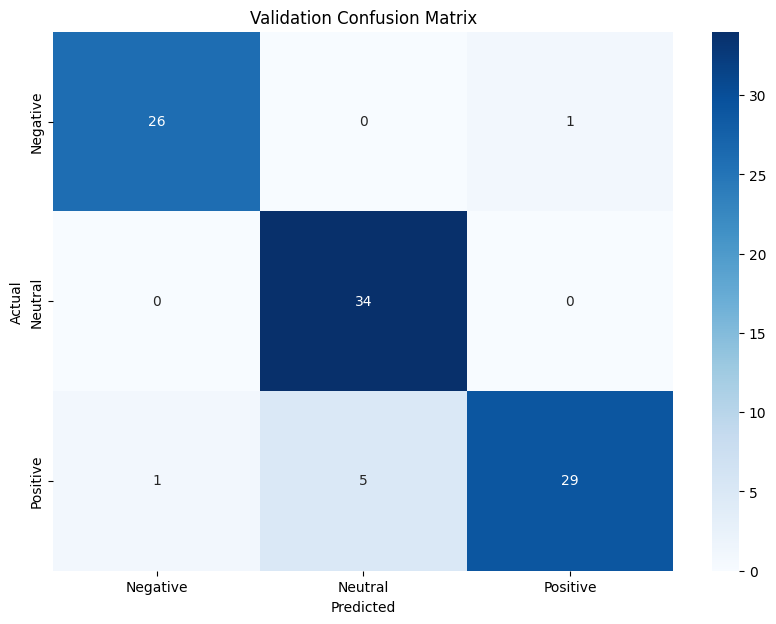

In [19]:

# Print validation results
print('Validation Accuracy:', val_accuracy)
print('Validation Classification Report:')
print(val_report)

# Plot validation confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

Test Accuracy: 0.9416666666666667
Test Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.93      0.96        41
     neutral       0.85      0.97      0.91        36
    positive       0.98      0.93      0.95        43

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.95      0.94      0.94       120



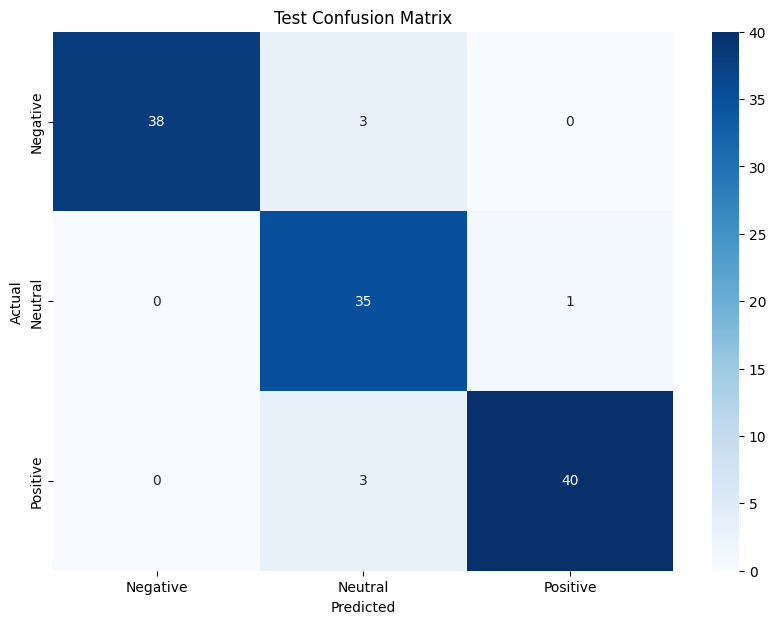

In [20]:

# Print test results
print('Test Accuracy:', test_accuracy)
print('Test Classification Report:')
print(test_report)

# Plot test confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Test Confusion Matrix')
plt.show()

In [21]:
# Test a single review
test_review = ["The product quality is decent but not as expected. It works fine for basic tasks but struggles with more demanding applications. Overall, it's an average product."]

# Transform the review using the TF-IDF vectorizer
test_review_tfidf = vectorizer.transform(test_review)

# Predict the sentiment
test_review_pred = model.predict(test_review_tfidf)

# Print the predicted sentiment
print("Test Review Sentiment:", test_review_pred[0])

Test Review Sentiment: positive


In [22]:
pickle.dump(model, open('Models/SVM.pkl', 'wb'))